In [203]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


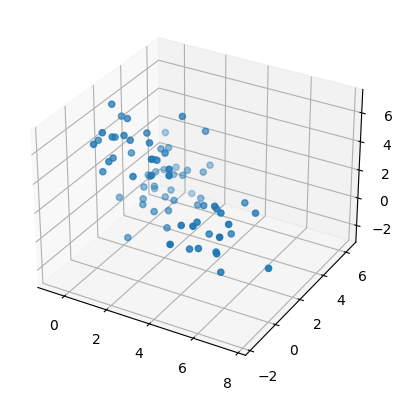

In [204]:
csv = np.loadtxt("clusters.csv", delimiter=",", dtype=str)
a, b, c = zip(*csv)
xs = list(map(float, a))
ys = list(map(float, b))
zs = list(map(float, c))
data = np.column_stack((xs, ys, zs))
fig = plt.figure()
sb = fig.add_subplot(projection='3d')
sb.scatter(xs, ys, zs)
plt.show()

In [205]:
def plt_show(data, clusters, centroids):
    fig = plt.figure()
    sb = fig.add_subplot(projection='3d')
    for c in centroids:
        sb.scatter(*np.array([v for v,m in zip(data, clusters) if m==c]).T)
        x,y,z = centroids[c]
        sb.plot(x, y, z, 'ro')
    plt.show()


def sklearn_init_centroids(data, k):
    kmeans = KMeans(n_clusters=k, copy_x=True, init='k-means++', max_iter=300, n_init=10, random_state=None, tol=0.0001, verbose=0)
    kmeans.fit(data)
    centers = kmeans.cluster_centers_
    centroids = {}
    for i in range(0, k):
        centroids[i + 1] = centers[i]
    return centroids

def calculate_centroid(points):
    # Cxyz = (sum(x)/Ck, sum(y)/Ck, sum(z)/Ck)
    l = len(points)
    if l > 0:
        x, y, z = zip(*points)
        xc = sum(x) / l
        yc = sum(y) / l
        zc = sum(z) / l
        return np.array([xc, yc, zc])
    return np.array([0,0,0])

def init_centroids(data, clusters, k):
    centroids = {}
    for c in range(1, k + 1):
        points = [v for v, i in zip(data, clusters) if i == c]
        centroids[c] = calculate_centroid(points)
    return centroids

def update_clusters(data, clusters, centroids):
    for i in range(len(data)):
        point = data[i]
        mdistance = float('inf')
        for c in centroids:
            center = centroids[c]
            distance = np.linalg.norm(point - center)
            if distance < mdistance:
                mdistance = distance
                clusters[i] = c

def update_centroids(data, clusters, centroids):
    for c in centroids:
        points = [v for v, i in zip(data, clusters) if i == c]
        centroids[c] = calculate_centroid(points)
            
def k_means(k, c = 50):
    k_index = [i for i in range(1, k + 1)]
    clusters = np.random.choice(k_index, size=len(data))
    centroids = { i: None for i in k_index }
    
    centroids = init_centroids(data, clusters, k)
    # centroids = sklearn_init_centroids(data, k)

    for _ in range(c):
        update_centroids(data, clusters, centroids)
        update_clusters(data, clusters, centroids)

    plt_show(data, clusters, centroids)

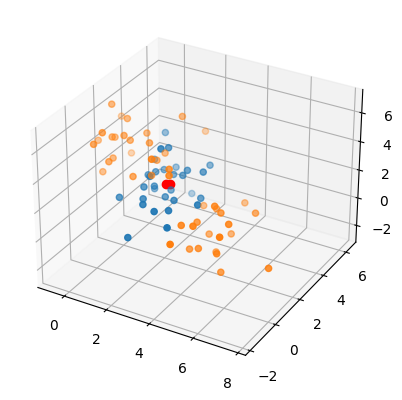

In [206]:
k_means(2, 50)

wcss_elbow


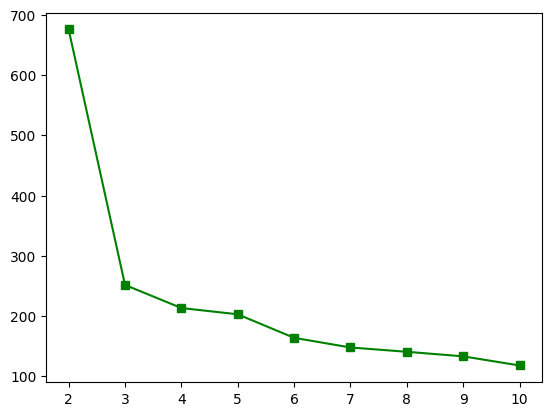

wcss_silhouette
2 0.3582494223608064
3 0.551361017484033
4 0.434550860002861
5 0.3901677787977743
6 0.29524516417422886
7 0.30169534281276383
8 0.27226096644127484
9 0.23789587136028592
10 0.26211815979052167
wcss_silhouette max [0.551361017484033, 3]


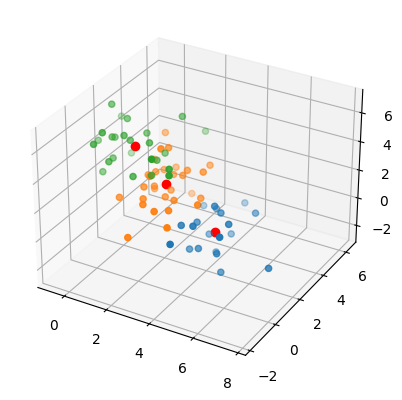

In [207]:
wcss_elbow = {}
wcss_silhouette = {}
 
for k in range(2, 11):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    model.fit(data)
    wcss_elbow[k] = model.inertia_

    pred = model.predict(data)
    wcss_silhouette[k] = silhouette_score(data, pred)

print('wcss_elbow')
plt.plot(wcss_elbow.keys(), wcss_elbow.values(), 'gs-')
plt.show()

print('wcss_silhouette')
wcss_silhouette_max = [0, 0]
for k in wcss_silhouette: 
    print(k, wcss_silhouette[k])
    if (wcss_silhouette[k] > wcss_silhouette_max[0]):
        wcss_silhouette_max[0] = wcss_silhouette[k]
        wcss_silhouette_max[1] = k

print('wcss_silhouette max', wcss_silhouette_max)

k_means(wcss_silhouette_max[1-])

